# Домашняя работа №6. Деревья решений

Цель работы: Обучить модель Деревья решений.

### Работа с набором данных для задачи классификации (целевая переменная - класс объекта)

## Задание №1

Использовать подготовленный в ДЗ5 набор данных

In [36]:
import pandas as pd

In [37]:
X_train = pd.read_csv('/content/X_train.csv').values
X_test = pd.read_csv('/content/X_test.csv').values
y_train = pd.read_csv('/content/y_train.csv')['Survived'].values
y_test = pd.read_csv('/content/y_test.csv')['Survived'].values

## Задание №2

#### Обучение модели
* Обучите модель деревья решений в Sklearn с параметрами по умолчанию.
* Вычислить метрики recall, precision, f1 на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

In [39]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [41]:
train_recall = recall_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

In [42]:
print("Метрики на тренировочной выборке:")
print(f"recall: {train_recall:.4f}, precision: {train_precision:.4f}, f1: {train_f1:.4f}")

if train_f1 >= 0.85:
    print("\nМодель показывает высокое качество на тренировочной выборке.")
elif train_f1 >= 0.70:
    print("\nМодель показывает хорошее качество на тренировочной выборке.")
else:
    print("\nКачество модели на тренировочной выборке требует улучшения.")

print("\nМетрики на тестовой выборке:")
print(f"recall: {test_recall:.4f}, precision: {test_precision:.4f}, f1: {test_f1:.4f}")


if test_f1 >= 0.85:
    print("\nМодель показывает высокое качество на тестовой выборке.")
elif test_f1 >= 0.70:
    print("\nМодель показывает хорошее качество на тестовой выборке.")
else:
    print("\nКачество модели на тестовой выборке требует улучшения.")

Метрики на тренировочной выборке:
recall: 0.9478, precision: 0.9961, f1: 0.9713

Модель показывает высокое качество на тренировочной выборке.

Метрики на тестовой выборке:
recall: 0.7432, precision: 0.7143, f1: 0.7285

Модель показывает хорошее качество на тестовой выборке.


In [43]:
print("\nМетрики на тестовой выборке:")
print(f"recall: {test_recall:.4f}, precision: {test_precision:.4f}, f1: {test_f1:.4f}")

if test_f1 >= 0.85:
    print("\nМодель показывает высокое качество на тестовой выборке.")
elif test_f1 >= 0.70:
    print("\nМодель показывает хорошее качество на тестовой выборке.")
else:
    print("\nКачество модели на тестовой выборке требует улучшения.")


Метрики на тестовой выборке:
recall: 0.7432, precision: 0.7143, f1: 0.7285

Модель показывает хорошее качество на тестовой выборке.


## Задание №3

#### Настройка гиперпараметров модели
* С помощью GridSearch подобрать оптимальные гиперпараметры (максимальную глубину дерева, минимальное количество листьев)
* Вычислить метрики полученной модели (f1, recall, precision).
* Сделать вывод о качестве обученной модели.
* Построить график ROC-кривой.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [45]:
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}

In [46]:
dtc = DecisionTreeClassifier()

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3]},
             scoring='accuracy')

In [47]:
best_params = grid_search.best_params_
print("Оптимальные параметры:", best_params)

final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

Оптимальные параметры: {'max_depth': 3, 'min_samples_leaf': 2}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [48]:
y_pred = final_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

if f1 >= 0.85:
    print("\nМодель показывает высокое качество.")
elif f1 >= 0.70:
    print("\nМодель показывает хорошее качество.")
else:
    print("\nКачество модели требует улучшения.")

Precision: 0.80
Recall: 0.69
F1 Score: 0.74

Модель показывает хорошее качество.


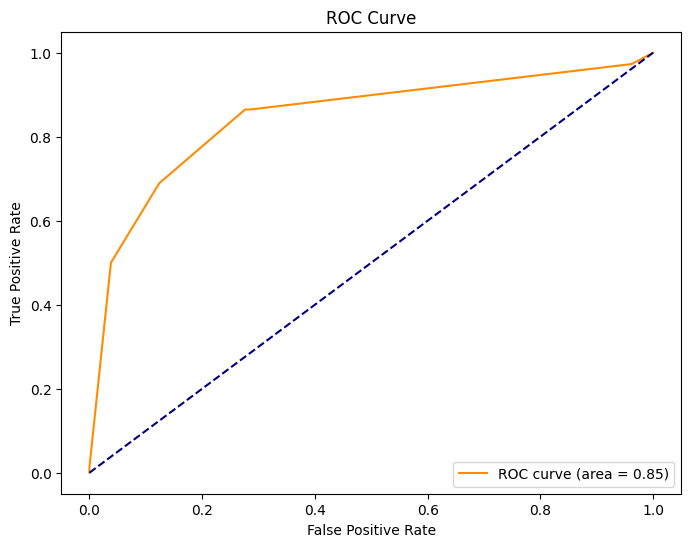

In [49]:
y_scores = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()